In [1]:
%pylab nbagg
from tvb.simulator.lab import *
from sklearn.ensemble import ExtraTreesRegressor
import operator
from scipy.signal import butter, lfilter
import scipy
import sim
import pickle
import copy
import os.path

Populating the interactive namespace from numpy and matplotlib
   INFO  log level set to INFO


In [21]:
#Data management stuff
path = 'Graphs/Pineau-Results/may29'
datapath = "Graphs/bigdata/"
result_no = 0

#No guarantees that changing any of the parameters below won't break the code

#Simulation Parameters
dt = 200
runtime = 20000
ic_buffer = 3000
frame_length = 800
valid_action = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#Learning Parameters
#action_weight = 0.8
#gamma = 0.9
iterations = 10


#Possible Actions

Parameters is a list of all parameters used to collect data (stored in pickle files).

valid_action is a list of actions that the algorithm will consider while making decisions.

In [3]:

test_time = 10000
parameters = [
              
              [0, 0, 0, 0, 'Control-0Hz', 0, test_time, 200],
              [1, 200, 1, 0, '5KHz-1pw-1amp',1,test_time, 200],
              [1, 67, 1, 0, '15KHz-1pw-1amp',2,test_time, 200],
              [1.25, 200, 1, 0, '5KHz-1pw-1_25amp',3,test_time, 200],
              [1.25, 67, 1, 0, '15KHz-1pw-1_25amp',4,test_time,200],
              [1.5, 200, 1, 0, '5KHz-1pw-1_5amp',5,test_time, 200],
              [1.5, 67, 1, 0, '15KHz-1pw-1_5amp',6,test_time, 200],
              [1.75, 200, 1, 0, '5KHz-1pw-1_75amp',7,test_time, 200],
              [1.75, 67, 1, 0, '15KHz-1pw-1_75amp',8,test_time,200],
              [2, 200, 1, 0, '5KHz-1pw-2amp', 9, test_time, 200],
              [2, 67, 1, 0, '15Khz-1pw-2amp', 10, test_time, 200],
              [2.25, 200, 1, 0, '5KHz-1pw-2_25amp', 11, test_time, 200],
              [2.25, 67, 1, 0, '15KHz-1pw-2_25amp', 12, test_time, 200],
              [2.5, 200, 1, 0, '5KHz-1pw-2_5amp', 13, test_time, 200],
              [2.5, 67, 1, 0, '15KHz-1pw-2_5amp', 14, test_time, 200],
            
              [1, 100, 1, 0, '10KHz-1pw-1amp',15,test_time, 200],
              [1.25, 100, 1, 0, '10KHz-1pw-1_25amp',16,test_time, 200],
              [1.5, 100, 1, 0, '10KHz-1pw-1_5amp',17,test_time, 200],
              [1.75, 100, 1, 0, '10KHz-1pw-1_75amp',18,test_time,200],
              [2, 100, 1, 0, '10KHz-1pw-2amp',19,test_time,200],
              [2.25, 100, 1, 0, '10KHz-1pw-2_25amp',20,test_time,200],
              [2.5, 100, 1, 0, '10KHz-1pw-2_5amp',21,test_time,200],
    
              [0.5, 20, 1, 0, '50KHz-1pw-0_5amp',22,test_time, 200],
              [0.75, 20, 1, 0, '50KHz-1pw-0_75amp',23,test_time, 200],
              [1, 20, 1, 0, '50KHz-1pw-1amp',24,test_time, 200],
    
              [0.5, 10, 1, 0, '100KHz-1pw-0_5amp',25,test_time, 200],
              [0.75, 10, 1, 0, '100KHz-1pw-0_75amp',26,test_time, 200],
              [1, 10, 1, 0, '100KHz-1pw-1amp',27,test_time, 200],
    
                
            ]

First, we want to retrieve data from saved pickle files.

In [19]:
data = import_data(parameters)

See how the gamma value affects our results

In [24]:
gamma_test = []
gs =[2, 5, 8, 1]
i = 0
for g in [0.2, 0.5, 0.8, 1]:
    predictor = fqi(data, dt, test_time, iterations, valid_action, action_weight = 0.8, gamma = g)
    ts, ds, simulation, stimulus = prepare_sim()
    ts, ds, states, actions = run_sim(ts, ds, simulation, stimulus, runtime, dt,valid_action, predictor)
    
    ictal_frames, ictal_length = seizure_count(states)
    
    gamma_test.append([g,ictal_frames,ictal_length,len(states)])
    
    plot_save_test(ts, ds, actions,states,runtime,dt,"gamma_test_", gs[i], (15, 10))
    i+=1

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
WARNING  File 'hemispheres' not found in ZIP.
time: 0
time: 1000
time: 2000
time: 3000
time: 4000
time: 5000
time: 6000
time: 7000
time: 8000
time: 9000
time: 10000
time: 11000
time: 12000
time: 13000
time: 14000
time: 15000
time: 16000
time: 17000
time: 18000
time: 19000
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
WARNING  File 'hemispheres' not found in ZIP.
time: 0
time: 1000
time: 2000
time: 3000
time: 4000
time: 5000
time: 6000
time: 7000
time: 8000
time: 9000
time: 10000
time: 11000
time: 12000
time: 13000
time: 14000
time: 15000
time: 16000
time: 17000
time: 18000
time: 19000
iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
WARNING  File 'hemispheres' not found in ZIP.
time: 0
time: 1000
time: 2000
time: 3000
time: 4

In [47]:
aw_test

[[0.8, 44, 3, 100],
 [0.8, 43, 2, 100],
 [0.8, 37, 3, 100],
 [0.8, 46, 5, 100],
 [0.8, 47, 6, 100],
 [0.8, 50, 6, 100]]

In [43]:
aw_test = []
aws =[0, 5, 20, 50, 80, 100]
g = 0.8
i = 0
for a in [0, 0.05, 0.2, 0.5, 0.8, 1]:
    
    print("Testing: " + str(aws[i]))
    predictor = fqi(data, dt, test_time, iterations, valid_action, action_weight = a, gamma = g)
    ts, ds, simulation, stimulus = prepare_sim()
    ts, ds, states, actions = run_sim(ts, ds, simulation, stimulus, runtime, dt,valid_action, predictor)
    
    ictal_frames, ictal_length = seizure_count(states)
    
    aw_test.append([g,ictal_frames,ictal_length,len(states)])
    
    plot_save_test(ts, ds, actions,states,runtime,dt,"aw_test-", aws[i], (15, 10))
    i+=1

Testing: 0
    iterating Q
WARNING  File 'hemispheres' not found in ZIP.
    time: 0
    time: 4000
    time: 8000
    time: 12000
    time: 16000
Testing: 5
    iterating Q
WARNING  File 'hemispheres' not found in ZIP.
    time: 0
    time: 4000
    time: 8000
    time: 12000
    time: 16000
Testing: 20
    iterating Q
WARNING  File 'hemispheres' not found in ZIP.
    time: 0
    time: 4000
    time: 8000
    time: 12000
    time: 16000
Testing: 50
    iterating Q
WARNING  File 'hemispheres' not found in ZIP.
    time: 0
    time: 4000
    time: 8000
    time: 12000
    time: 16000
Testing: 80
    iterating Q
WARNING  File 'hemispheres' not found in ZIP.
    time: 0
    time: 4000
    time: 8000
    time: 12000
    time: 16000
Testing: 100
    iterating Q
WARNING  File 'hemispheres' not found in ZIP.
    time: 0
    time: 4000
    time: 8000
    time: 12000
    time: 16000


Run the Fitted Q Iteration and return a predictor

In [99]:
predictor = fqi(data, dt, test_time, iterations, valid_action)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [146]:
predictor_c = fqi(data, dt, test_time, 0, valid_action)
ts_c, ds_c, s_c, stim_c = prepare_sim()
print("Simulation Ready")
ts_c, ds_c, states_c, actions_c = run_sim(ts_c, ds_c, s_c, stim_c, runtime, dt,[0], predictor)

WARNING  File 'hemispheres' not found in ZIP.
Simulation Ready
time: 0
time: 1000
time: 2000
time: 3000
time: 4000
time: 5000
time: 6000
time: 7000
time: 8000
time: 9000
time: 10000
time: 11000
time: 12000
time: 13000
time: 14000
time: 15000
time: 16000
time: 17000
time: 18000
time: 19000


In [185]:
ts_c1, ds_c1, s_c1, stim_c1 = prepare_sim()
print("Simulation Ready")
ts_c1, ds_c1, states_c1, actions_c1 = run_sim(ts_c1, ds_c1, s_c1, stim_c1, runtime, dt,[5], predictor)
plot_save_test(ts_c1, ds_c1, actions_c1,states_c1,runtime,dt,"FixedStim5", 0, (15, 10))

WARNING  File 'hemispheres' not found in ZIP.
Simulation Ready
time: 0
time: 1000
time: 2000
time: 3000
time: 4000
time: 5000
time: 6000
time: 7000
time: 8000
time: 9000
time: 10000
time: 11000
time: 12000
time: 13000
time: 14000
time: 15000
time: 16000
time: 17000
time: 18000
time: 19000


In [147]:
plot_save_test(ts_c, ds_c, actions_c,states_c,runtime,dt,"control", 0, (15, 10))

In [186]:
seizure_count(states_c1)

(43, 3)

In [108]:
ts, ds, simulation, stimulus = prepare_sim()
print("Simulation Ready")
ts, ds, states, actions = run_sim(ts, ds, simulation, stimulus, runtime, dt,valid_action, predictor)

WARNING  File 'hemispheres' not found in ZIP.
Simulation Ready
time: 0
time: 1000
time: 2000
time: 3000
time: 4000
time: 5000
time: 6000
time: 7000
time: 8000
time: 9000
time: 10000
time: 11000
time: 12000
time: 13000
time: 14000
time: 15000
time: 16000
time: 17000
time: 18000
time: 19000


In [129]:
plot_save_test(ts, ds, actions,states,runtime,dt,"FQI", 0, (15, 10))

Compare Number of Seizure States and Seizure Lengths 

In [218]:
n_c, len_c = seizure_count(states_c)
n_fqi, len_fqi = seizure_count(states)
n_fix, len_fix = seizure_count(states_c1)

stim_c = 0
stim_fqi = len(actions) - actions.count(0)
stim_fix = len(actions_c1) - actions_c1.count(0)

In [220]:
stim_fqi

25

<IPython.core.display.Javascript object>


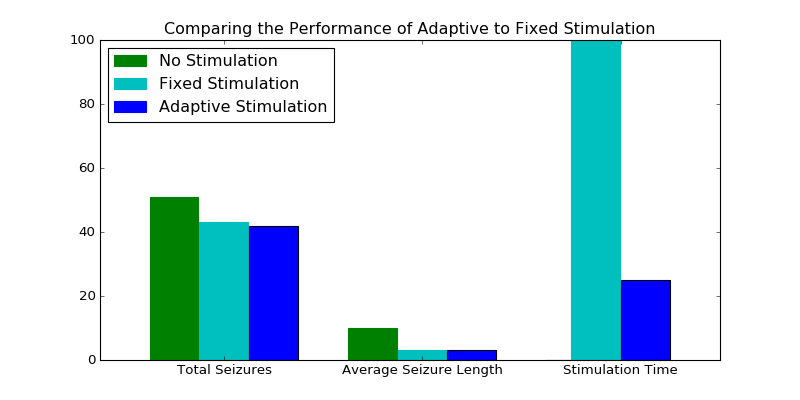

In [233]:
ioff()
fig, ax1 = pyplot.subplots(figsize=(10,5))
#ax2 = ax1.twinx()

bars1 = ax1.bar([0.2,0.4,0.6, 1,1.2,1.4, 1.8, 1.9, 2.1], [n_c, n_fix, n_fqi, len_c, len_fix, len_fqi, stim_c, stim_fix, stim_fqi], 0.197)


#


bars1[0].set_color('g')
bars1[3].set_color('g')

bars1[1].set_color('c')
bars1[4].set_color('c')
bars1[7].set_color('c')

xticks([0.5, 1.3, 2.1,], ["Total Seizures", "Average Seizure Length", "Stimulation Time"])


red = matplotlib.patches.Patch(color='g', label = 'No Stimulation')
blue = matplotlib.patches.Patch(color='c', label = 'Fixed Stimulation')
green = matplotlib.patches.Patch(color='b', label = 'Adaptive Stimulation')

legend(handles=[red,blue,green], loc="upper left")
title("Comparing the Performance of Adaptive to Fixed Stimulation")
savefig(path + "compare")
ax2.set_ylim(0,12)
show()

Analyze the results

In [30]:
def seizure_count(states):

    ictals = []
    past_ict = 0
    ict_len = 0
    ict_lens = []
    for state in states:
        ictal = is_ictal(state)
        ictals.append(ictal)
        if ictal == 1:
            ict_len += 1
        if past_ict == 1 and ictal == 0:
            ict_lens.append(ict_len)
            ict_len = 0
        past_ict = ictal
    if ictal != 0:
        ict_lens.append(ict_len)
        
    
    total_seizures = sum(ictals)
    average_length = sum(ict_lens)/len(ict_lens)
        
    return total_seizures, average_length

In [31]:
ict_lens

NameError: name 'ict_lens' is not defined

In [32]:
def prepare_sim(): 
    epileptic = [9]
    almost_epileptic = []
    stimulus_target = [9]
    stimulus_amplitude = 0
    stimulus_weight = 2 #0-2 for each region
    onset = 0
    period = 0
    pulse_width = 0
    frame_length = 800
    ic_buffer = 3000 #buffer for initial conditions
    (s, stimulus) = sim.set_sim(epileptic, almost_epileptic, stimulus_target, stimulus_amplitude, 
                  stimulus_weight, onset, period, pulse_width, runtime)


    (t_t, t_d), (aa, aa1), (bb, bb1) = s.run(simulation_length = ic_buffer)

    t_all = copy.copy(t_t)
    d_all = copy.copy(t_d)

    return t_all, d_all, s, stimulus

In [33]:
def run_sim(t_all, d_all, s, stimulus, runtime, dt, valid_action, predictor):
    test_states = []
    action_log = []
    for i in range(runtime/dt):
        if i%20 == 0:
            print "    time: " + str(i*dt)
        if i == 0:
            action_log.append(0)

        (t,d), (aaa, bbb), (ccc,ddd) = s.run(simulation_length = dt)
        t_all = np.append(t_all, t, axis = 0)
        d_all = np.append(d_all, d, axis = 0)

        frame_data = d_all[ ic_buffer + (i+1)*dt - frame_length : ic_buffer + (i+1)*dt ,0,9,0] 
        frame_time = t_all[ ic_buffer + (i+1)*dt - frame_length : ic_buffer + (i+1)*dt ] 

        state = analyze_frame(frame_data, dt, frame_length)

        bestaction = random.choice(valid_action)
        bestval = predictor.predict(append(state, bestaction).reshape(1,-1))[0]

        for action in valid_action:
            val = predictor.predict(append(state, action).reshape(1,-1))[0]
            #print("     Action: " + str(action) + " Value: " + str(val))
            if val > bestval:
                bestaction = action
                bestval = val
        #print "best value is : " + str(bestval) + "\n"
        #print "best action is : " + str(bestaction) + "\n"
        action = bestaction


        action_p = action_params(action)
        T = action_p[0]
        tau = action_p[1]
        amp = action_p[2]

        stimulus.temporal.parameters["amp"] = amp
        stimulus.temporal.parameters["T"] = T
        stimulus.temporal.parameters["tau"] = tau

        test_states.append(state)
        action_log.append(action)
    return t_all, d_all, test_states, action_log

In [34]:
def is_ictal(state):
    if state[3] < 0:
        return 1
    else:
        return 0

In [35]:
def action_params(action):
    if action == 0:
        t = 0
        p = 0
        a = 0
    elif action == 1:
        t = 200
        p = 1
        a = 1
    elif action == 2:
        t = 67
        p = 1
        a = 1
    elif action == 3:
        t = 200
        p = 1
        a = 1.25
    elif action == 4:
        t = 67
        p = 1
        a = 1.25
    elif action == 5:
        t = 200
        p = 1
        a = 1.5
    elif action == 6:
        t = 67
        p = 1
        a = 1.5
    elif action == 7:
        t = 200
        p = 1
        a = 1.75
    elif action == 8:
        t = 67
        p = 1
        a = 1.75
    elif action == 9:
        t = 200
        p = 1
        a = 2
    elif action == 10:
        t = 67
        p = 1
        a = 2
    elif action == 11:
        t = 200
        p = 1
        a = 2.25
    elif action == 12:
        t = 67
        p = 1
        a = 2.25
    elif action == 13:
        t = 200
        p = 1
        a = 2.5
    elif action == 14:
        t = 67
        p = 1
        a = 2.5
    elif action == 15:
        t = 100
        p = 1
        a = 1
    elif action == 16:
        t = 100
        p = 1
        a = 1.25
    elif action == 17:
        t = 100
        p = 1
        a = 1.5
    elif action == 18:
        t = 100
        p = 1
        a = 1.75
    elif action == 19:
        t = 100
        p = 1
        a = 2
    elif action == 20:
        t = 100
        p = 1
        a = 2.25
    elif action == 21:
        t = 100
        p = 1
        a = 2.5
    elif action == 22:
        t = 20
        p = 1
        a = 0.5
    elif action == 23:
        t = 20
        p = 1
        a = 0.75
    elif action == 24:
        t = 20
        p = 1
        a = 1
    elif action == 25:
        t = 10
        p = 1
        a = 0.5
    elif action == 26:
        t = 10
        p = 1
        a = 0.75
    elif action == 27:
        t = 10
        p = 1
        a = 1
     
     
        
    return (t,p,a)


#Import Test Data

In [36]:
def import_data(params):
    ret = []
    for f in params:
        filepath = datapath + f[4] + '.p'
        if os.path.isfile(filepath):
            readfile = open(filepath, 'r')
            in_var = pickle.load(readfile)
            ret.append([in_var[0],in_var[1],in_var[2]])
            
        else:
            print("Not found: " + filepath)
    return ret

#Analyze test set
Use 800 ms frames that move by 200 ms (dt = 200, frame_len = 800)
ictal_log has the same format as action_log, where 1 corresponds to ictal and 0 corresponds to inter-ictal states.

In [37]:
def analyze_frame(d, dt, frame_len):
    data = np.array(d)
    data_sq = square(data)
    data_fft = abs(fft.fft(data))**2/10000
    
    
    #Full
    maxi_long = max(data)
    mini_long = min(data)
    rng_long = maxi_long-mini_long
    avg_long = sum(data)/len(data)
    tot_eng_long = sum(data_fft)
    loF_eng_long = sum(data_fft[:len(data_fft)/3])
    miF_eng_long = sum(data_fft[len(data_fft)/3:2*len(data_fft)/3])
    hiF_eng_long = sum(data_fft[2*len(data_fft)/3:])

    #Half 
    half = len(data)/2
    data_fft_half = abs(fft.fft(data[half:]))
    maxi_half = max(data[half:])
    mini_half = min(data[half:])
    rng_half = maxi_half-mini_half
    avg_half = sum(data[half:])/len(data[half:])
    tot_eng_half = sum(data_fft_half)
    loF_eng_half = sum(data_fft_half[:len(data_fft_half)/3])
    miF_eng_half = sum(data_fft_half[len(data_fft_half)/3:2*len(data_fft_half)/3])
    hiF_eng_half = sum(data_fft_half[2*len(data_fft_half)/3:])


    #Quarter
    qt = 3*len(data)/4
    data_fft_qt = abs(fft.fft(data[qt:]))
    maxi_qt = max(data[qt:])
    mini_qt = min(data[qt:])
    rng_qt = maxi_qt=mini_qt
    avg_qt = sum(data[qt:])/len(data[qt:])
    tot_eng_qt = sum(data_fft_qt)
    loF_eng_qt = sum(data_fft_qt[:len(data_fft_qt)/3])
    miF_eng_qt = sum(data_fft_qt[len(data_fft_qt)/3:2*len(data_fft_qt)/3])
    hiF_eng_qt = sum(data_fft_qt[2*len(data_fft_qt)/3:])


    #Eighth 
    eit = 7*len(data)/8
    data_fft_eit = abs(fft.fft(data[eit:]))
    maxi_eit = max(data[eit:])
    mini_eit = min(data[eit:])
    rng_eit = maxi_eit-mini_eit
    avg_eit = sum(data[eit:])/len(data[eit:])
    tot_eng_eit = sum(data_fft_eit)
    loF_eng_eit = sum(data_fft_eit[:len(data_fft_eit)/3])
    miF_eng_eit = sum(data_fft_eit[len(data_fft_eit)/3:2*len(data_fft_eit)/3])
    hiF_eng_eit = sum(data_fft_eit[2*len(data_fft_eit)/3:])


    state = [
             #stim_T, stim_pw, stim_amp,
             #maxi_long, mini_long, rng_long, avg_long, tot_eng_long, loF_eng_long, miF_eng_long, hiF_eng_long,
             #maxi_half, mini_half, rng_half, avg_half, tot_eng_half, loF_eng_half, miF_eng_half, hiF_eng_half,
             maxi_qt, mini_qt, rng_qt, avg_qt, tot_eng_qt, loF_eng_qt, miF_eng_qt, hiF_eng_qt, 
             maxi_eit, mini_eit, rng_eit, avg_eit, tot_eng_eit, loF_eng_eit, miF_eng_eit, hiF_eng_eit, 
            ]
    return state

In [38]:
def analyze_set(t, d, action_log, ictal_log, dt, time, action_weight = 0.8):
    frame_len = 800
    
    
    n_frames = (time-frame_len)/dt
    
    state_transition = []
    
    #Hand Annotate
#        ictal_log = []
    
    for i in range((n_frames)):
    
        time = t[i*dt:i*dt+frame_len]
        data = np.array(d[i*dt:i*dt+frame_len,0,9,0])
        #ictal = ictal_log[i + frame_len/dt]
        action = action_log[i+frame_len/dt]
        data_sq = square(data)
        data_fft = abs(fft.fft(data))**2/10000
        
        ##HAND ANNOTATE
#        if sum(data[3*len(data)/4:])/len(data[3*len(data)/4:])/len(data[3*len(data)/4:]) < 0:
#            ictal = 1
#        else: ictal = 0
#        ictal_log.append(ictal)
        ##HAND ANNOTATE
        
        
        #Stim
        action_p = action_params(action)
        stim_T = action_p[0]
        stim_pw = action_p[1]
        stim_amp = action_p[2]
        
        #Use analyze_frame instead of this block
        
        #Full
        maxi_long = max(data)
        mini_long = min(data)
        rng_long = maxi_long-mini_long
        avg_long = sum(data)/len(data)
        tot_eng_long = sum(data_fft)
        loF_eng_long = sum(data_fft[:len(data_fft)/3])
        miF_eng_long = sum(data_fft[len(data_fft)/3:2*len(data_fft)/3])
        hiF_eng_long = sum(data_fft[2*len(data_fft)/3:])
        
        #Half 
        half = len(data)/2
        data_fft_half = abs(fft.fft(data[half:]))
        maxi_half = max(data[half:])
        mini_half = min(data[half:])
        rng_half = maxi_half-mini_half
        avg_half = sum(data[half:])/len(data[half:])
        tot_eng_half = sum(data_fft_half)
        loF_eng_half = sum(data_fft_half[:len(data_fft_half)/3])
        miF_eng_half = sum(data_fft_half[len(data_fft_half)/3:2*len(data_fft_half)/3])
        hiF_eng_half = sum(data_fft_half[2*len(data_fft_half)/3:])
        
        
        #Quarter
        qt = 3*len(data)/4
        data_fft_qt = abs(fft.fft(data[qt:]))
        maxi_qt = max(data[qt:])
        mini_qt = min(data[qt:])
        rng_qt = maxi_qt=mini_qt
        avg_qt = sum(data[qt:])/len(data[qt:])
        tot_eng_qt = sum(data_fft_qt)
        loF_eng_qt = sum(data_fft_qt[:len(data_fft_qt)/3])
        miF_eng_qt = sum(data_fft_qt[len(data_fft_qt)/3:2*len(data_fft_qt)/3])
        hiF_eng_qt = sum(data_fft_qt[2*len(data_fft_qt)/3:])
        
        
        #Eighth 
        eit = 7*len(data)/8
        data_fft_eit = abs(fft.fft(data[eit:]))
        maxi_eit = max(data[eit:])
        mini_eit = min(data[eit:])
        rng_eit = maxi_eit-mini_eit
        avg_eit = sum(data[eit:])/len(data[eit:])
        tot_eng_eit = sum(data_fft_eit)
        loF_eng_eit = sum(data_fft_eit[:len(data_fft_eit)/3])
        miF_eng_eit = sum(data_fft_eit[len(data_fft_eit)/3:2*len(data_fft_eit)/3])
        hiF_eng_eit = sum(data_fft_eit[2*len(data_fft_eit)/3:])
        
        
        state = [
                 #stim_T, stim_pw, stim_amp,
                 #maxi_long, mini_long, rng_long, avg_long, tot_eng_long, loF_eng_long, miF_eng_long, hiF_eng_long,
                 #maxi_half, mini_half, rng_half, avg_half, tot_eng_half, loF_eng_half, miF_eng_half, hiF_eng_half,
                 maxi_qt, mini_qt, rng_qt, avg_qt, tot_eng_qt, loF_eng_qt, miF_eng_qt, hiF_eng_qt, 
                 maxi_eit, mini_eit, rng_eit, avg_eit, tot_eng_eit, loF_eng_eit, miF_eng_eit, hiF_eng_eit, 
                ]
        
        action_penalty = 0
        if action != 0:
            action_penalty = -1

        

    
        ictal = is_ictal(state)
        ictal_log.append(ictal)

        reward = - ictal + action_weight * action_penalty
        
        #use previous state in learning
        state_transition.append([state, action, reward])
        
    return state_transition

In [39]:
def fqi(results, dt, time, iterations, action_set, action_weight = 0.8, gamma = 0.9):
    all_transitions = setup_data(results, dt, time)
    
    tree_in = []
    tree_out = []
    nextstate = []
    
    for state_transition in all_transitions:
        for i in range(len(state_transition) - 1):
            if i > 0:
                previous_state = copy.deepcopy(state_transition[i-1][0])
                result_state = copy.deepcopy(state_transition[i][0])
                action_taken = state_transition[i][1]
                reward = state_transition[i][2]
                relative_reward = reward - state_transition[i-1][2]

                state_action = append(previous_state,action_taken)#[previous_state, action] #should they be in a single array?
                out = reward

                tree_in.append(state_action)
                tree_out.append(out)
                nextstate.append(result_state)
                
    predictor = iterate_q(tree_in, tree_out, nextstate,iterations,action_set)
    
    return predictor

#Set up dataset

In [40]:
def setup_data(results,dt,time):
    all_state_transitions = []
    for i in range(len(results)):
        t = results[i][0]
        d = results[i][1]
        a = results[i][2]
        ict = []
        

        s_t = analyze_set(t, d, a, ict, dt, time)
        all_state_transitions.append(s_t)
    return all_state_transitions

#Fitted Q Iteration
Just like Guez did it

In [41]:
def iterate_q(ins, outs, nextstate, iterations, valid_action, gamma = 0.9):
    etrees = ExtraTreesRegressor()
    N = 0;
    print "    iterating Q"
    for x in range(iterations):
        N += 1
        out_new = copy.copy(outs)
        if N > 1:
            for i in range(len(outs)):
                bestaction = random.choice(valid_action)
                
                bestval = etrees.predict(append(nextstate[i], bestaction).reshape(1,-1))
                
                for action in valid_action:
                    val = etrees.predict(append(nextstate[i], action).reshape(1,-1))
                    if val > bestval:
                        bestaction = action
                        bestval = val
                #print ("nextstate: " + str(nextstates[i]) + " best action: " + str(bestaction) + " val: "+str(bestval) )
                out_new[i] += gamma*bestval #gamma = 0.9
        etrees.fit(ins, np.ravel(out_new))
        #if x%(iterations/10.) == 0:
        
        
        
    return etrees

In [42]:
def plot_save_test(t_all, d_all, action_log, test_states, sim_time, dt, filename, result_no, size = (15,10)):
    fig, ax1 = pyplot.subplots(figsize=size)
    ax2 = ax1.twinx()
    ioff()
    ax1.plot(t_all[3000:]-2999.5,d_all[3000:,0,9,0], 'r', label = "Local Field Potential")

    #ax2.plot((t_all[3000:3051]-2999.5)*200, action_log)
    for i in range(sim_time/dt):
        if i == 0:
            timeframe = ax1.plot([i*dt, i*dt], [-3, 3],'g', alpha = 0.1, label = "Frame Start")
        else:
            ax1.plot([i*dt, i*dt], [-3, 3],'g', alpha = 0.1)
    i = 0
    framestart = 0
    stim = 0
    for n in range(len(t_all[3000:])):
        if n % dt == 0 :

            i += 1
            framestart = n
            p = action_params(action_log[i-1])
            period = p[0]
            amp = p[2]
        if  period != 0 and (n - framestart == 0 or (n - framestart) % period ==0 ) :

            if stim == 0:
                ax2.plot([t_all[3000+n]-2999.5, t_all[3000+n]-2999.5], [-amp, amp], 'b', linewidth = 1.5, alpha = 0.5, label = "Stimulus")
                stim += 1
            else:
                ax2.plot([t_all[3000+n]-2999.5, t_all[3000+n]-2999.5], [-amp, amp], 'b', linewidth = 1.5, alpha = 0.5)
    title("Neurostimulation with Offline Reinforcement Learning \n" + filename)


    red = matplotlib.patches.Patch(color='red', label = 'LFP')
    blue = matplotlib.patches.Patch(color='blue', label = 'Stimulus')
    green = matplotlib.patches.Patch(color='green',alpha=0.3, label = 'Frame Start')

    legend(handles=[red,blue,green])


    #show()

    
    fig.savefig(path + "result-" + filename + str(result_no))
    savefile = open(path + "result-" + filename + str(result_no)+'.p','w')
    pickle.dump((t_all, d_all, action_log, test_states), savefile)